<div style="color:White; display:fill; border-radius:5px;background-color:#dd4124;font-size:270%;font-family:sans-serif;letter-spacing:0.5px;text-align: center">
Digit Recogniser | Dimension Reduction PCA, t-SNE, UMAP
</div>

<img src="https://i.ibb.co/JHDc1Tn/tree.png" alt="tree" border="0">

<div style="color:White; display:fill; border-radius:5px;background-color:#dd4124;font-size:270%;font-family:sans-serif;letter-spacing:0.5px;text-align: center">
Table of Contents:
</div>

<a id=0></a>

* [1. Import Data](#1)
* [2. Digit Plots](#2)
* [3. PCA](#3)
* [4. Dimension Reduction](#4)
* [5. PCA + t-SNE](#5)
* [6. PCA + UMAP](#6)
* [7. My First Artificial Neural networks (ANN) Model](#7)
* [8. Logistic Regression vs Perceptron](#8)
* [9. Building an Image Classifier Using Keras Simple Sequential Class](#9)
* [10.Building an Image Classifier Using Keras Simple Functional Class](#10)
* [11. TensorBoard on Kaggle](#11)

In [ ]:
#computation import 
import pandas as pd
import numpy as np
import os
import sklearn.metrics as metrics
from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.metrics import accuracy_score
import warnings
warnings.filterwarnings('ignore')
from scipy import stats

#plot imports
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib as mpl

#management import
import gc
import time

%matplotlib inline

<div style="color:White; display:fill; border-radius:5px;background-color:#dd4124;font-size:270%;font-family:sans-serif;letter-spacing:0.5px;text-align: center">
1. Import Data
</div>

* [Jump Top](#0)
<a id=1></a>

In [ ]:
%time
dir = '../input/digit-recognizer/'
z = '.csv'
train = pd.read_csv(dir+'train'+z)
test = pd.read_csv(dir+'test'+z)

In [ ]:
#ENV SETUP OF THE NOTEBOOK
TARGET = 'label'
FOLD = 5
SEED = 42

In [ ]:
print('Train Shape: ',train.shape)
train.head(10)

In [ ]:
print('Test Shape: ',test.shape)
test.head(10)

In [ ]:
#seeing for missing values
print(f'''Train Null Count: {train.isnull().sum().sum()}
Test Null Count: {test.isnull().sum().sum()}''')

In [ ]:
y = train[TARGET]
train.drop(TARGET,axis=1,inplace=True)

#check if all columns in train is in test
assert train.columns.to_list() == test.columns.to_list()

<div style="color:White; display:fill; border-radius:5px;background-color:#dd4124;font-size:270%;font-family:sans-serif;letter-spacing:0.5px;text-align: center">
2. Digit Plots
</div>

* [Jump Top](#0)
<a id=2></a>



In [ ]:
#function to plot multiple digits
def plot_digits(instances, images_per_row=5, **options):
    size = 28
    images_per_row = min(len(instances), images_per_row)
    images = [instance.reshape(size,size) for instance in instances]
    n_rows = (len(instances) - 1) // images_per_row + 1
    row_images = []
    n_empty = n_rows * images_per_row - len(instances)
    images.append(np.zeros((size, size * n_empty)))
    for row in range(n_rows):
        rimages = images[row * images_per_row : (row + 1) * images_per_row]
        row_images.append(np.concatenate(rimages, axis=1))
    image = np.concatenate(row_images, axis=0)
    plt.imshow(image, cmap = mpl.cm.binary, **options)
    plt.axis("off")

In [ ]:
#single digit plot
some_digit = train.iloc[0].values
some_digit_image = some_digit.reshape(28, 28)
plt.imshow(some_digit_image, cmap=mpl.cm.binary)
plt.axis("off")
plt.show()

In [ ]:
#multiple digit plot
example_images = train.iloc[:100].values
plot_digits(example_images, images_per_row=10)

In [ ]:
#plot the count of labels in the training dataset
_x = y.value_counts().index
_y = y.value_counts().values

sns.barplot(_x,_y)

del _x, _y
gc.collect()

<div style="color:White; display:fill; border-radius:5px;background-color:#dd4124;font-size:170%;font-family:sans-serif;letter-spacing:0.5px;text-align: center">
Note: Upvote is Free!!!
</div>

<div style="color:White; display:fill; border-radius:5px;background-color:#CD5C5C;font-size:100%;font-family:sans-serif;letter-spacing:0.5px;text-align: center">
<h2>Exercise</h2>Train a Random Forest classifier on the dataset and time how long it takes, then evaluate the resulting model on the test set.
</div>

In [ ]:
from sklearn.ensemble import RandomForestClassifier
X_train, X_test, y_train, y_test = train_test_split(train,y,test_size=0.2,
                                                    random_state=SEED)

start_time = time.time()
rf = RandomForestClassifier(n_estimators=100, random_state=SEED)
rf.fit(X_train,y_train)

execution_time = time.time() - start_time

print(f"Training took {execution_time:.2f}s")

In [ ]:
y_hat = rf.predict(X_test)
round(accuracy_score(y_test,y_hat)*100,2)

In [ ]:
cv = StratifiedKFold(n_splits=5,shuffle=True,random_state=SEED)
start_time = time.time()
for fold,(train_indx,test_indx) in enumerate(cv.split(train,y)):
    X_train, X_test = train.iloc[train_indx].reset_index(drop=True),train.iloc[test_indx].reset_index(drop=True)
    y_train, y_test = y.iloc[train_indx].reset_index(drop=True),y.iloc[test_indx].reset_index(drop=True)
    
    rf = RandomForestClassifier(n_estimators=100,random_state=fold)
    rf.fit(X_train,y_train)
    
    y_hat = rf.predict(X_test)
    print(f'Fold {fold+1}: Accuracy Score: {round(accuracy_score(y_test,y_hat)*100,2)}%')
    print('='*30)
execution_time = time.time() - start_time

del X_train, X_test, y_train, y_test, rf, cv, y_hat
gc.collect()

print(f"5 Folds Took: {execution_time:.2f}s")

<div style="color:White; display:fill; border-radius:5px;background-color:#dd4124;font-size:270%;font-family:sans-serif;letter-spacing:0.5px;text-align: center">
3. PCA
</div>

* [Jump Top](#0)
<a id=3></a>



<div style="color:White; display:fill; border-radius:5px;background-color:#A569BD;font-size:100%;font-family:sans-serif;letter-spacing:0.5px;text-align: center">
<h2>Exercise</h2>Next, use PCA to reduce the dataset's dimensionality, with an explained variance ratio of 95%.
</div>

In [ ]:
from sklearn.decomposition import PCA

X_train, X_test, y_train, y_test = train_test_split(train,y,test_size=0.2,
                                                    random_state=SEED)

pca = PCA(n_components=0.95)
X_train_reduced = pca.fit_transform(X_train)
print('Shape of train-set After PCA:',X_train_reduced.shape)

In [ ]:
'''
The following code compresses the MNIST dataset down to 154 dimensions, then
uses the inverse_transform() method to decompress it back to 784 dimensions:
'''

X_recovered = pca.inverse_transform(X_train_reduced)

#single digit plot
some_digit = X_recovered[0]
some_digit_image = some_digit.reshape(28, 28)
plt.imshow(some_digit_image, cmap=mpl.cm.binary)
plt.axis("off")
plt.show()

<div style="color:White; display:fill; border-radius:5px;background-color:#27AE60;font-size:100%;font-family:sans-serif;letter-spacing:0.5px;text-align: center">
<h2>Exercise</h2>Train a new Random Forest classifier on the reduced dataset and see how long it takes. Was training much faster?
</div>

In [ ]:
start_time = time.time()
rf = RandomForestClassifier(n_estimators=100, random_state=SEED)
rf.fit(X_train_reduced,y_train)

execution_time = time.time() - start_time

print(f"Training took {execution_time:.2f}s")

<div style="color:White; display:fill; border-radius:5px;background-color:#E74C3C;font-size:100%;font-family:sans-serif;letter-spacing:0.5px;text-align: center">
<h2>Oh no!</h2>Training is actually more than twice slower now! How can that be? Well, as we saw in this chapter, dimensionality reduction does not always lead to faster training time: it depends on the dataset, the model and the training algorithm.
</div>



<div style="color:White; display:fill; border-radius:5px;background-color:#283747;font-size:100%;font-family:sans-serif;letter-spacing:0.5px;text-align: center">
<h2>Exercise</h2>Next evaluate the classifier on the test set: how does it compare to the previous classifier?
</div>

In [ ]:
X_test_reduced = pca.transform(X_test)

y_hat = rf.predict(X_test_reduced)
round(accuracy_score(y_test,y_hat)*100,2)

<div style="color:White; display:fill; border-radius:5px;background-color:#800080;font-size:100%;font-family:sans-serif;letter-spacing:0.5px;text-align: center">
<h2>Poor</h2>It is common for performance to drop slightly when reducing dimensionality, because we do lose some useful signal in the process. However, the performance drop is rather severe in this case. So PCA really did not help: it slowed down training and reduced performance. :(
</div>

<div style="color:White; display:fill; border-radius:5px;background-color:#008080;font-size:120%;font-family:sans-serif;letter-spacing:0.5px;text-align: center">
Let's see if it helps when using softmax regression:
</div>

In [ ]:
from sklearn.linear_model import LogisticRegression

log_clf = LogisticRegression(multi_class="multinomial", solver="saga", random_state=SEED)

start_time = time.time()
log_clf.fit(X_train, y_train)
end_time = time.time()

ex_time =  end_time - start_time
print(f"Training took {ex_time:.2f}s")

In [ ]:
y_pred = log_clf.predict(X_test)
round(accuracy_score(y_test, y_pred),2)*100

<div style="color:White; display:fill; border-radius:5px;background-color:#008000;font-size:100%;font-family:sans-serif;letter-spacing:0.5px;text-align: center">
<h2>Okay</h2>so softmax regression takes much longer to train on this dataset than the random forest classifier, plus it performs worse on the test set. But that's not what we are interested in right now, we want to see how much PCA can help softmax regression. Let's train the softmax regression model using the reduced dataset:
</div>


In [ ]:
log_clf2 = LogisticRegression(multi_class="multinomial", solver="saga", random_state=SEED)

start_time = time.time()
log_clf2.fit(X_train_reduced, y_train)
end_time = time.time()

ex_time =  end_time - start_time
print(f"Training took {ex_time:.2f}s")

In [ ]:
y_pred = log_clf.predict(X_test)
round(accuracy_score(y_test, y_pred),2)*100

<div style="color:White; display:fill; border-radius:5px;background-color:#808000;font-size:100%;font-family:sans-serif;letter-spacing:0.5px;text-align: center">
<h2>Nice!</h2>
Reducing dimensionality led to over 2× speedup. :)
A very slight drop in performance, which might be a reasonable price to pay for a 2× speedup, depending on the application.
So there you have it: PCA can give you a formidable speedup... but not always!
</div>

<div style="color:White; display:fill; border-radius:5px;background-color:#dd4124;font-size:270%;font-family:sans-serif;letter-spacing:0.5px;text-align: center">
4. Dimension Reduction
</div>

* [Jump Top](#0)
<a id=4></a>



<div style="color:White; display:fill; border-radius:5px;background-color:#CD5C5C;font-size:100%;font-family:sans-serif;letter-spacing:0.5px;text-align: center">
Use t-SNE to reduce the MNIST dataset down to two dimensions and plot the result using Matplotlib. You can use a scatterplot using 10 different colors to represent each image's target class.  
Dimensionality reduction on the full 42,000 images takes a very long time, so let's only do this on a random subset of 10,000 images:

In [ ]:
np.random.seed(SEED) #setting up the seed

m = 10000
idx = np.random.permutation(42000)[:m]

X = train.iloc[idx,:]
y = y[idx]

In [ ]:
from sklearn.manifold import TSNE
start_time = time.time()
tsne = TSNE(n_components=2, random_state=SEED)
X_reduced = tsne.fit_transform(X)
end_time = time.time()

print(end_time - start_time)

In [ ]:
plt.figure(figsize=(13,10))
plt.scatter(X_reduced[:, 0], X_reduced[:, 1],s=12, c=y, cmap="tab10")
plt.axis('off')
plt.colorbar()
plt.show()

In [ ]:
#function to plot scatter plot with digits on it.

from sklearn.preprocessing import MinMaxScaler
from matplotlib.offsetbox import AnnotationBbox, OffsetImage

def plot_digits(X, y, min_distance=0.05, images=None, figsize=(13, 10)):
    # Let's scale the input features so that they range from 0 to 1
    X_normalized = MinMaxScaler().fit_transform(X)
    # Now we create the list of coordinates of the digits plotted so far.
    # We pretend that one is already plotted far away at the start, to
    # avoid `if` statements in the loop below
    neighbors = np.array([[10., 10.]])
    # The rest should be self-explanatory
    plt.figure(figsize=figsize)
    cmap = mpl.cm.get_cmap("jet")
    digits = np.unique(y)
    for digit in digits:
        plt.scatter(X_normalized[y == digit, 0], X_normalized[y == digit, 1],s=12, c=[cmap(digit / 9)])
    plt.axis("off")
    ax = plt.gcf().gca()  # get current axes in current figure
    for index, image_coord in enumerate(X_normalized):
        closest_distance = np.linalg.norm(neighbors - image_coord, axis=1).min()
        if closest_distance > min_distance:
            neighbors = np.r_[neighbors, [image_coord]]
            if images is None:
                plt.text(image_coord[0], image_coord[1], str(int(y[index])),
                         color=cmap(y[index] / 9), fontdict={"weight": "bold", "size": 16})
            else:
                image = images[index].reshape(28, 28)
                imagebox = AnnotationBbox(OffsetImage(image, cmap="binary"), image_coord)
                ax.add_artist(imagebox)

In [ ]:
plot_digits(X_reduced, y, images=X.values, figsize=(22, 22))

In [ ]:
from sklearn.decomposition import PCA
start_time = time.time()
tsne = PCA(n_components=2, random_state=SEED)
X_reduced = tsne.fit_transform(X)
end_time = time.time()

print(f'{round(end_time - start_time,2)}s')

In [ ]:
plot_digits(X_reduced, y, images=X.values, figsize=(22, 22))

In [ ]:
from sklearn.manifold import LocallyLinearEmbedding
start_time = time.time()
tsne = LocallyLinearEmbedding(n_components=2, random_state=SEED)
X_reduced = tsne.fit_transform(X)
end_time = time.time()

print(f'{round(end_time - start_time,2)}s')

In [ ]:
plot_digits(X_reduced, y, images=X.values, figsize=(22, 22))

In [ ]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
start_time = time.time()
tsne = LinearDiscriminantAnalysis(n_components=2)
X_reduced = tsne.fit_transform(X,y)
end_time = time.time()

print(f'{round(end_time - start_time,2)}s')

In [ ]:
plot_digits(X_reduced, y, images=X.values, figsize=(22, 22))

In [ ]:
import umap
start_time = time.time()
tsne = umap.UMAP(n_components=2, random_state=SEED)
X_reduced = tsne.fit_transform(X)
end_time = time.time()

print(f'{round(end_time - start_time,2)}s')

In [ ]:
from sklearn.pipeline import Pipeline
pca_tsne = Pipeline([
    ("pca", PCA(n_components=0.95, random_state=42)),
    ("tsne", TSNE(n_components=2, random_state=42)),
])
start_time = time.time()
X_pca_tsne_reduced = pca_tsne.fit_transform(X)
end_time = time.time()
print("PCA+t-SNE took {:.1f}s.".format(end_time - start_time))
plot_digits(X_pca_tsne_reduced, y.values)
plt.show()

In [ ]:
plot_digits(X_pca_tsne_reduced, y, images=X.values, figsize=(22, 22))

<div style="color:White; display:fill; border-radius:5px;background-color:#dd4124;font-size:270%;font-family:sans-serif;letter-spacing:0.5px;text-align: center">
5. PCA + t-SNE
</div>

* [Jump Top](#0)
<a id=5></a>



In [ ]:
plot_digits(X_pca_tsne_reduced, y, images=X.values, figsize=(22, 22))

<div style="color:White; display:fill; border-radius:5px;background-color:#dd4124;font-size:270%;font-family:sans-serif;letter-spacing:0.5px;text-align: center">
6. PCA + UMAP
</div>

* [Jump Top](#0)
<a id=6></a>



In [ ]:
pca_umap = Pipeline([
    ("pca", PCA(n_components=0.95, random_state=SEED)),
    ("umap", umap.UMAP(n_components=2, random_state=SEED)),
])
start_time = time.time()
X_pca_umap_reduced = pca_umap.fit_transform(X)
end_time = time.time()
print("PCA+UMAP took {:.1f}s.".format(end_time - start_time))
plot_digits(X_pca_umap_reduced, y.values)
plt.show()

In [ ]:
plot_digits(X_pca_umap_reduced, y, images=X.values, figsize=(22, 22))

<div style="color:White; display:fill; border-radius:5px;background-color:#dd4124;font-size:270%;font-family:sans-serif;letter-spacing:0.5px;text-align: center">
7. My First Artificial Neural networks (ANN) Model
</div>

# ANNs
ANNs are at the very core of Deep Learning. They are versatile, powerful, and scala‐
ble, making them ideal to tackle large and highly complex Machine Learning tasks
such as classifying billions of images (e.g., Google Images), powering speech recogni‐
tion services (e.g., Apple’s Siri), recommending the best videos to watch to hundreds
of millions of users every day (e.g., YouTube), or learning to beat the world champion
at the game of Go (DeepMind’s AlphaGo).

# Perceptron

The Perceptron is one of the simplest ANN architectures, invented in 1957 by Frank
Rosenblatt. It is based on a slightly different artificial neuron (see Figure below) called
a threshold logic unit (TLU), or sometimes a linear threshold unit (LTU). The inputs
and output are numbers (instead of binary on/off values), and each input connection
is associated with a weight. The TLU computes a weighted sum of its inputs (z = w1 x1 + w2 x2 ... + wn xn = x⊺ w), then applies a step function to that sum and outputs the
result: hw(x) = step(z), where z = x⊺ w.

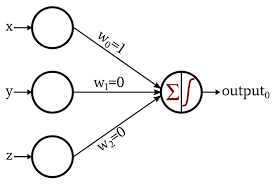

> Threshold logic unit: an artificial neuron which computes a weighted sum
of its inputs then applies a step function

# Step Function

<img src="https://www.simplilearn.com/ice9/free_resources_article_thumb/Perceptron/Perceptron_9.jpg">

Perceptrons are trained using a variant of this rule that takes
into account the error made by the network when it makes a prediction
Perceptron learning rule reinforces connections that help reduce the error. More
specifically, the Perceptron is fed one training instance at a time, and for each
instance it makes its predictions. For every output neuron that produced a wrong
prediction, it reinforces the connection weights from the inputs that would have con‐
tributed to the correct prediction.


The decision boundary of each output neuron is linear, so Perceptrons are incapable
of learning complex patterns (just like Logistic Regression classifiers). However, if the
training instances are linearly separable, Rosenblatt demonstrated that this algorithm
would converge to a solution.This is called the [**Perceptron convergence theorem**](http://web.mit.edu/course/other/i2course/www/vision_and_learning/perceptron_notes.pdf).

* [Jump Top](#0)
<a id=7></a>

In [ ]:
_X = train[:5000]
_y = y[:5000]

<div style="color:White; display:fill; border-radius:5px;background-color:#dd4124;font-size:270%;font-family:sans-serif;letter-spacing:0.5px;text-align: center">
8. Logistic Regression Vs Perceptron
</div>

Logistic Regression perform better than perceptron. see this document for more:
[Connections between Perceptron and Logistic Regression (and SVM)](https://www.cs.utexas.edu/~gdurrett/courses/fa2021/perc-lr-connections.pdf)

* [Jump Top](#0)
<a id=8></a>



In [ ]:
import numpy as np
from sklearn.linear_model import Perceptron, LogisticRegression

#starified kfold
cv = StratifiedKFold(n_splits=5,shuffle=True,random_state=SEED)
start_time = time.time()
for fold,(train_indx,test_indx) in enumerate(cv.split(_X,_y)):
    X_train, X_test = _X.iloc[train_indx].reset_index(drop=True),_X.iloc[test_indx].reset_index(drop=True)
    y_train, y_test = _y.iloc[train_indx].reset_index(drop=True),_y.iloc[test_indx].reset_index(drop=True)
    
    #perceptron and logistic regression comparision
    per = Perceptron(tol=1e-3, random_state=SEED)
    logi = LogisticRegression(solver='saga',random_state=SEED,multi_class='multinomial')
    
    per.fit(X=X_train,y=y_train)
    logi.fit(X=X_train,y=y_train)
    
    y_hat = per.predict(X_test)
    y_hat_lr = logi.predict(X_test)
    
    print(f'Fold {fold+1}:Perceptron Accuracy Score: {round(accuracy_score(y_test,y_hat)*100,2)}%')
    print(f'Fold {fold+1}:Logistic Regression Accuracy Score: {round(accuracy_score(y_test,y_hat_lr)*100,2)}%')

    print('='*30)
execution_time = time.time() - start_time

del X_train, X_test, y_train, y_test, cv, y_hat, y_hat_lr, _X, _y
gc.collect()

<div style="color:White; display:fill; border-radius:5px;background-color:#dd4124;font-size:270%;font-family:sans-serif;letter-spacing:0.5px;text-align: center">
9. Building an Image Classifier Using Keras Simple Sequential Class
</div>

> First let's import TensorFlow and Keras.

* [Jump Top](#0)
<a id=9></a>



## **Using TensorBoard for Visualization**

In [ ]:
import os

root_dir = os.path.join(os.curdir,'my_logs')

def get_run_log():
    import time
    run_id = time.strftime('run_%Y_%m_%d-%H_%M_%S')
    return os.path.join(root_dir,run_id)


In [ ]:
import tensorflow as tf
from tensorflow import keras

tf.__version__, keras.__version__

In [ ]:
train.loc[0].min(), train.loc[0].max() #we need to scale down the greyscale value to 0-1 (normalize)

In [ ]:
dir = '../input/digit-recognizer/'
z = '.csv'
train = pd.read_csv(dir+'train'+z)
test = pd.read_csv(dir+'test'+z)

y = train[TARGET]
train.drop(TARGET,axis=1,inplace=True)

#normalizing the values between 0 and 1
X_valid, X_train = train[:5000] / 255., train[5000:] / 255.
y_valid, y_train = y[:5000], y[5000:]
X_test = test / 255.

In [ ]:
plt.imshow(X_train.iloc[0,:].values.reshape(28,28), cmap="binary")
print(y_train.iloc[0])
plt.axis('off')
plt.show() #ploting the first row of all the columns to plot the digit

In [ ]:
train.shape

In [ ]:
#clearing previous states and seeding
keras.backend.clear_session()  #Resets all state generated by Keras.
np.random.seed(42) #seed for reuseablity
tf.random.set_seed(42)
#initializing model
model = keras.models.Sequential()
model.add(keras.layers.Dense(300, activation="relu",input_shape=(784,))) #first layer with 300 neurons and we also mentioned the input shape
model.add(keras.layers.Dense(100, activation="relu")) #secound layer with relu activation 
model.add(keras.layers.Dense(10, activation="softmax")) #output layer with softmax function as this is the multiclass classification problem

In [ ]:
model.layers #we can see all the layers as list of object (only if mentioned the input shape above)

In [ ]:
model.summary() #it shows all the information about the model like layer name, input/output shape etc. for more info please refer tensorflow documents

In [ ]:
keras.utils.plot_model(model, "simple_keras_sequential.png", show_shapes=True)

In [ ]:
hidden1 = model.layers[1]
hidden1.name

In [ ]:
model.get_layer(hidden1.name) is hidden1

In [ ]:
weights, biases = hidden1.get_weights()
weights

In [ ]:
biases

In [ ]:
weights.shape, biases.shape

In [ ]:
#compiling model (mentioning the loss and metrics for the model)
model.compile(loss="sparse_categorical_crossentropy",
              optimizer="sgd",
              metrics=["accuracy"])

In [ ]:
#using earlystopping callback to use best model and avoid overfitting 
callback = keras.callbacks.EarlyStopping(patience=10,restore_best_weights=True)

#tensorboard
run_log = get_run_log()
tensorboard_cb = keras.callbacks.TensorBoard(run_log)

history = model.fit(X_train, y_train, epochs=100,validation_data=(X_valid, y_valid), callbacks= [callback,tensorboard_cb])

In [ ]:
history.params

In [ ]:
print(history.epoch)
history.history.keys()

In [ ]:
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

In [ ]:
model.evaluate(X_valid, y_valid)

In [ ]:
sample_submission = pd.read_csv('../input/digit-recognizer/sample_submission.csv')

preds = model.predict(test)
np.argmax(preds, axis=-1)

sample_submission.Label = np.argmax(preds, axis=-1)
sample_submission.to_csv('keras_Squesntial_model.csv',index=False)

## Using Earlystopping callback on simple sequential class

In [ ]:
skf = StratifiedKFold(n_splits=5,random_state=SEED, shuffle=True)

prediction = {}
prediction['sequential'] = []

for fold, (train_indx,valid_indx) in enumerate(skf.split(train,y)):
    X_train, X_valid = train.loc[train_indx,:].reset_index(drop=True) /255, train.loc[valid_indx,:].reset_index(drop=True) /255
    y_train, y_valid = y.loc[train_indx].reset_index(drop=True), y.loc[valid_indx].reset_index(drop=True)
    
    #clearing previous states and seeding
    keras.backend.clear_session()  #Resets all state generated by Keras.
    np.random.seed(42) #seed for reuseablity
    tf.random.set_seed(42)

    #initializing model
    model = keras.models.Sequential()
    model.add(keras.layers.Dense(300, activation="relu",input_shape=(784,))) #first layer with 300 neurons and we also mentioned the input shape
    model.add(keras.layers.Dense(100, activation="relu")) #secound layer with relu activation 
    model.add(keras.layers.Dense(10, activation="softmax")) #output layer with softmax function as this is the multiclass classification problem

    #compiling model (mentioning the loss and metrics for the model)
    model.compile(loss="sparse_categorical_crossentropy",
              optimizer="sgd",
              metrics=["accuracy"])
    
    #using earlystopping callback to use best model and avoid overfitting 
    callback = keras.callbacks.EarlyStopping(patience=10,restore_best_weights=True)
    history = model.fit(X_train, y_train, epochs=100,
                        validation_data=(X_valid, y_valid), callbacks=[callback])
    
    #ploting the model history for every fold
    pd.DataFrame(history.history).plot(figsize=(8, 5))
    plt.grid(True)
    plt.gca().set_ylim(0, 1)
    plt.show()
    
    #make prediction on the test set
    preds = model.predict_proba(test)
    
    #save the prediction of every fold in dictionary
    prediction['sequential'].append(preds)
    
    #cleaning up memory
    del X_train, y_train, X_valid, y_valid, history, model, preds
    gc.collect()

In [ ]:
#taking mean of each columns and then converting to class label
sample_submission.Label = np.argmax(np.mean(prediction['sequential'],axis=0),axis=1)
sample_submission.to_csv('Sequentialkeras_5fold.csv',index=False)

<div style="color:White; display:fill; border-radius:5px;background-color:#dd4124;font-size:270%;font-family:sans-serif;letter-spacing:0.5px;text-align: center">
10. Building an Image Classifier Using Keras Simple Functional Class
</div>

> The Keras functional API is a way to create models that are more flexible than the tf.keras.Sequential API. The functional API can handle models with non-linear topology, shared layers, and even multiple inputs or outputs.

* [Jump Top](#0)
<a id=10></a>



In [ ]:
dir = '../input/digit-recognizer/'
z = '.csv'
train = pd.read_csv(dir+'train'+z)
test = pd.read_csv(dir+'test'+z)

y = train[TARGET]
train.drop(TARGET,axis=1,inplace=True)

#normalizing the values between 0 and 1
X_valid, X_train = train[:5000] / 255., train[5000:] / 255.
y_valid, y_train = y[:5000], y[5000:]
X_test = test / 255.

In [ ]:
#clearing previous states and seeding
keras.backend.clear_session()  #Resets all state generated by Keras.
np.random.seed(42) #seed for reuseablity
tf.random.set_seed(42)
#initializing model

input_ = keras.layers.Input(shape=(784,))
hidden1 = keras.layers.Dense(300, activation="relu")(input_) #first layer with 300 neurons and we also mentioned the input shape
hidden2 = keras.layers.Dense(100, activation="relu")(hidden1) #secound layer with relu activation 
concat = keras.layers.Concatenate()([input_, hidden2])
output_ = keras.layers.Dense(10, activation="softmax")(concat) #output layer with softmax function as this is the multiclass classification problem

model = keras.Model(inputs=[input_], outputs=[output_])

In [ ]:
model.summary()

In [ ]:
keras.utils.plot_model(model, "simple_keras_functional.png", show_shapes=True)

In [ ]:
#compiling model (mentioning the loss and metrics for the model)
model.compile(loss="sparse_categorical_crossentropy",
              optimizer="sgd",
              metrics=["accuracy"])

In [ ]:
#using earlystopping callback to use best model and avoid overfitting 
callback = keras.callbacks.EarlyStopping(patience=10,restore_best_weights=True)


#tensorboard
run_log = get_run_log()
tensorboard_cb = keras.callbacks.TensorBoard(run_log)

history = model.fit(X_train, y_train, epochs=100,validation_data=(X_valid, y_valid), callbacks= [callback,tensorboard_cb])

In [ ]:
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

In [ ]:
model.evaluate(X_valid, y_valid)

In [ ]:
sample_submission = pd.read_csv('../input/digit-recognizer/sample_submission.csv')

preds = model.predict(test)
np.argmax(preds, axis=-1)

sample_submission.Label = np.argmax(preds, axis=-1)
sample_submission.to_csv('keras_Functional_model.csv',index=False)

In [ ]:
skf = StratifiedKFold(n_splits=5,random_state=SEED, shuffle=True)

prediction = {}
prediction['Functional'] = []

for fold, (train_indx,valid_indx) in enumerate(skf.split(train,y)):
    X_train, X_valid = train.loc[train_indx,:].reset_index(drop=True) /255, train.loc[valid_indx,:].reset_index(drop=True) /255
    y_train, y_valid = y.loc[train_indx].reset_index(drop=True), y.loc[valid_indx].reset_index(drop=True)
    
    #clearing previous states and seeding
    keras.backend.clear_session()  #Resets all state generated by Keras.
    np.random.seed(42) #seed for reuseablity
    tf.random.set_seed(42)
    
    #initializing model
    input_ = keras.layers.Input(shape=(784,))
    hidden1 = keras.layers.Dense(300, activation="relu")(input_) #first layer with 300 neurons and we also mentioned the input shape
    hidden2 = keras.layers.Dense(100, activation="relu")(hidden1) #secound layer with relu activation 
    concat = keras.layers.Concatenate()([input_, hidden2])
    output_ = keras.layers.Dense(10, activation="softmax")(concat) #output layer with softmax function as this is the multiclass classification problem

    model = keras.Model(inputs=[input_], outputs=[output_])
    
    #compiling model (mentioning the loss and metrics for the model)
    model.compile(loss="sparse_categorical_crossentropy",
              optimizer="sgd",
              metrics=["accuracy"])
    
    #using earlystopping callback to use best model and avoid overfitting 
    callback = keras.callbacks.EarlyStopping(patience=10,restore_best_weights=True)
    history = model.fit(X_train, y_train, epochs=100,
                        validation_data=(X_valid, y_valid), callbacks=[callback])
    
    #ploting the model history for every fold
    pd.DataFrame(history.history).plot(figsize=(8, 5))
    plt.grid(True)
    plt.gca().set_ylim(0, 1)
    plt.show()
    
    #make prediction on the test set
    preds = model.predict(test)
    
    #save the prediction of every fold in dictionary
    prediction['Functional'].append(preds)
    
    #cleaning up memory
    del X_train, y_train, X_valid, y_valid, history, model, preds
    gc.collect()

In [ ]:
#taking mode of each columns and then converting to class label
sample_submission.Label = np.argmax(stats.mode(prediction['Functional'],axis=0)[0][0],axis=1)
sample_submission.to_csv('Functionalkeras_5fold.csv',index=False)

<div style="color:White; display:fill; border-radius:5px;background-color:#dd4124;font-size:270%;font-family:sans-serif;letter-spacing:0.5px;text-align: center">
11. TensorBoard on Kaggle
</div>

> Kaggle New Feature: [How to use TensorBoard in Kaggle Kernel](https://www.kaggle.com/product-feedback/89671)


> [TensorBoard on Kaggle](https://www.kaggle.com/shivam1600/tensorboard-on-kaggle)


* [Jump Top](#0)
<a id=11></a>



## **Start Tensorboard**

In [ ]:
# Download Ngrok to tunnel the tensorboard port to an external port
!wget https://bin.equinox.io/c/4VmDzA7iaHb/ngrok-stable-linux-amd64.zip
!unzip ngrok-stable-linux-amd64.zip

# Run tensorboard as well as Ngrox (for tunneling as non-blocking processes)
import os
import multiprocessing


pool = multiprocessing.Pool(processes = 10)
results_of_processes = [pool.apply_async(os.system, args=(cmd, ), callback = None )
                        for cmd in [
                        f"tensorboard --logdir ./my_logs --host 0.0.0.0 --port 6006 &",
                        "./ngrok http 6006 &"
                        ]]

## **Get the url to access tensorboad**
Note: This block of code might throw an error while running all blocks at time. So run blocks one by one till the block below

In [ ]:
! curl -s http://localhost:4040/api/tunnels | python3 -c \
    "import sys, json; print(json.load(sys.stdin)['tunnels'][0]['public_url'])"